In [1]:
# import os
import sys
import importlib
sys.path.append("/tmp/pycharm_project_568/Classification/")
# # from dataset_tool.dataset_loader import *
# import importer
# from dataset_tool.dataset_loader import *
import dataset_tool.dataset_loader
importlib.reload(dataset_tool.dataset_loader)

<module 'dataset_tool.dataset_loader' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_loader.py'>

In [2]:
dataset = dataset_tool.dataset_loader.load_dataset5()

test
Shape of array is (6966,)
COnfig path /tmp/pycharm_project_568/Classification/dataset_config
to_learch forest,field,water,city
Processing forest
Size of forest is 456100
Processing field
Size of field is 982700
Processing water
Size of water is 155000
Processing city
Size of city is 49600
Train size: 1314720. Test size: 328680


In [3]:
import Classification.dataset_tool.dataset_loader

ModuleNotFoundError: No module named 'Classification'

In [4]:
x_train = dataset.x_train
y_train = dataset.y_train

In [5]:
y_train[y_train != 4] = 2


In [6]:
y_train[y_train == 4] = 1

In [7]:
from cuml.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=400, p=2, weights='uniform')
knnc_epochs = 20
# for i in range(knnc_epochs):
knn_1.fit(x_train, y_train)

KNeighborsClassifier()

In [105]:
topixels = lambda x: x*255

In [106]:
import numpy as np

In [107]:
x_train_2 = np.vectorize(topixels)(x_train)

In [98]:
x_train.shape

(1314720, 12)

In [97]:
x_train_2.shape

(1314720, 12)

In [102]:
x_train_2_ = x_train_2.astype(np.int32)

In [104]:
x_train_2_.dtype

dtype('int32')

In [121]:
from cuml.naive_bayes import *
nb = BernoulliNB()
nb.fit(x_train_2, y_train)

BernoulliNB()

In [91]:
from dataset_tool.real_prediction import *

In [92]:
real_prediction_knn = RealPrediction("/tmp/shared/dataset4/2", None)

In [12]:
real_prediction_knn.x_scaled_base.shape

(697972, 12)

In [13]:
predciton_proba = knn_1.predict_proba(real_prediction_knn.x_scaled_base)

In [109]:
x_testt_scaled_2 = np.vectorize(topixels)(real_prediction_knn.x_scaled_base)

In [122]:
predciton_proba_nb = nb.predict_proba(real_prediction_knn.x_scaled_base)

In [ ]:
import numpy as np

In [27]:
predciton_proba.shape

(697972, 2)

In [39]:
ts = 0.9

In [43]:
def check_vlue(subarr):
    print(subarr)
    if (subarr[1] >= ts):
        return 2
    else:
        return 1

## >= 0.9

In [49]:
preditctions0_9 = np.where(predciton_proba[:,0] >= 0.9, 1, 2)

In [123]:
preditctions0_9_nb = np.where(predciton_proba_nb[:,0] >= 0.9, 1, 2)

In [124]:
preditctions0_9.shape

(697972,)

In [118]:
im0_9  = preditctions0_9.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [125]:
im0_9nb  = preditctions0_9_nb.reshape((real_prediction_knn.height,real_prediction_knn.width))

### KNNC

[Text(1, 1, 'city'), Text(1, 2, 'others')]

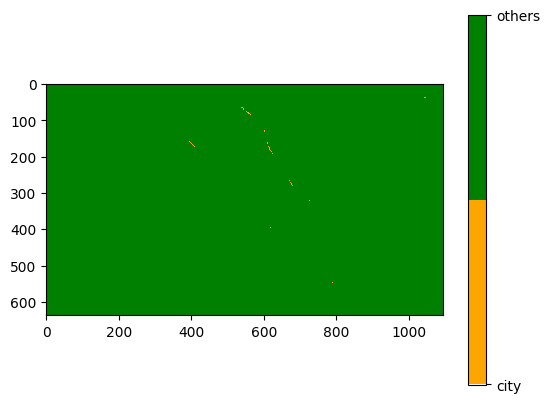

In [112]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(im0_9, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "KKNC"
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

### NB

[Text(1, 1, 'city'), Text(1, 2, 'others')]

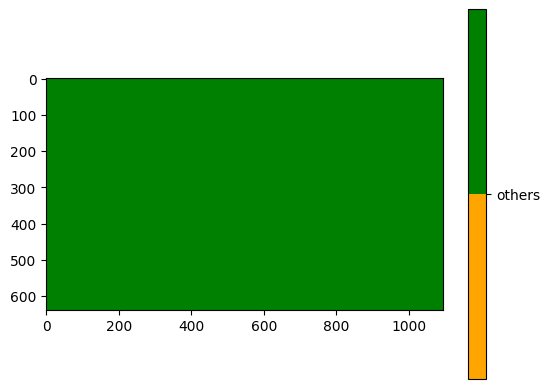

In [126]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(im0_9nb, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

## >= 0.8

In [53]:
preditctions0_8 = indices = np.where(predciton_proba[:, 0] >= 0.8, 1, 2)

In [54]:
im0_8  = preditctions0_8.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

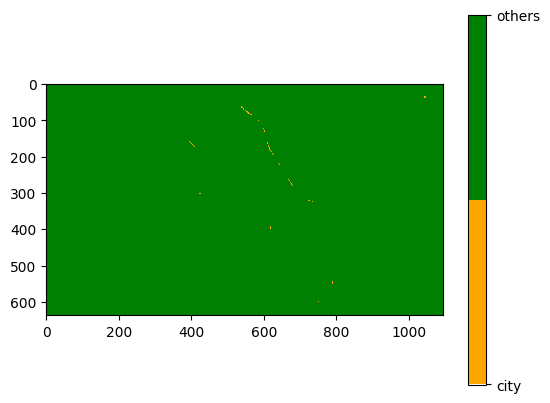

In [55]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(im0_8, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "KKNC"
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

## >= 0.7

In [56]:
preditctions0_7 = indices = np.where(predciton_proba[:, 0] >= 0.7, 1, 2)

In [57]:
im0_7  = preditctions0_7.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

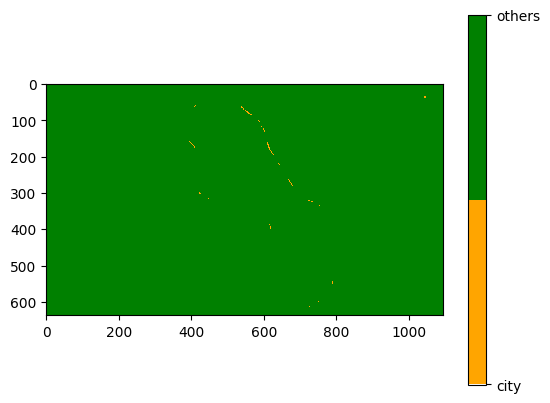

In [58]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(im0_7, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "KKNC"
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

## >= 0.6

In [66]:
preditctions0_6 = np.where(predciton_proba[:, 0] >= 0.6, 1, 2)

In [67]:
im0_6  = preditctions0_6.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

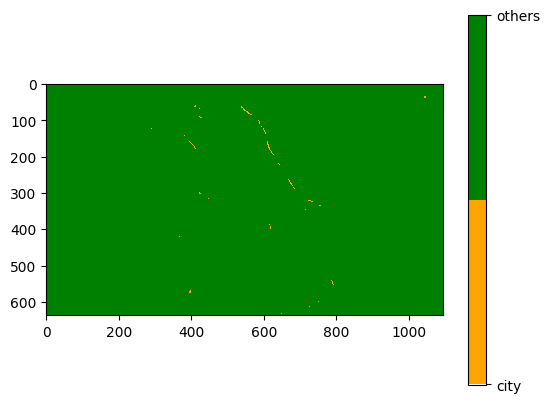

In [68]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(im0_6, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "KKNC"
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

## >= 0.5

In [69]:
preditctions0_5 = np.where(predciton_proba[:, 0] >= 0.5, 1, 2)

In [70]:
im0_5  = preditctions0_5.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

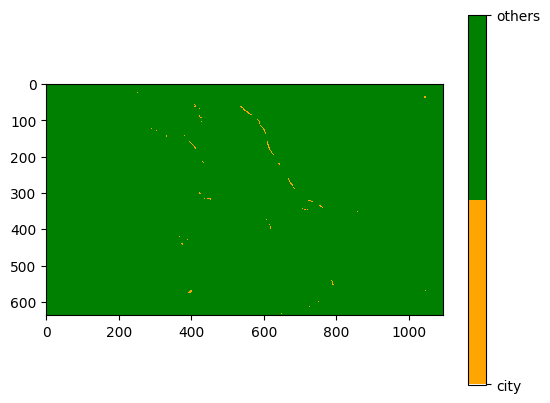

In [71]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(im0_5, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "KKNC"
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

In [72]:
len(im0_5[im0_5 == 1])

1678

In [73]:
imm = knn_1.predict(real_prediction_knn.x_scaled_base)

In [74]:
imm_d = imm.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

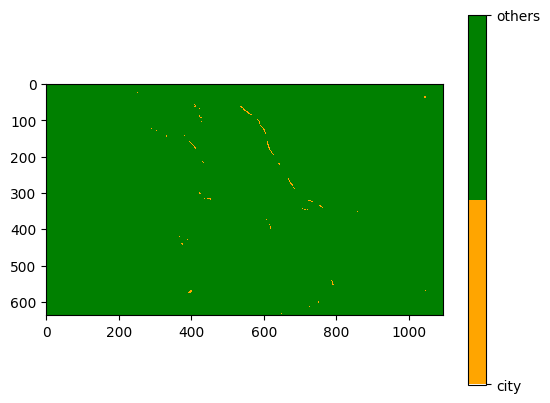

In [75]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(imm_d, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "KKNC"
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

In [76]:
real_prediction_knn.predict()

TypeError: 'NoneType' object is not iterable